In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

logreg = LogisticRegression().fit(X_train, y_train)
print ('test set score{:.2f}'.format(logreg.score(X_test, y_test)))

test set score0.88


In [3]:
# 이번장의 목표
# 일반화 성능 측정 방법인 교차검증
# score 메써드가 제공하는 정확도와 R**2 값 이외에 분류와 회귀성능을 측정하는 다른 방법

In [4]:
X.shape

(100, 2)

In [5]:
y.shape

(100,)

# 5.1 교차검증(Cross_validation)

- 가장 널리 사용되는 방법 K-fold cross-validation
- 먼저 fold를 나눠야함(비슷한 크기의 부분집합, 나누는 갯수 K)
- 5개가 생성됬다고 하면 1번은 테스트 셋, 2-5번은 트레인 셋으로 사용, 평가
- 이런 식으로 5번 반복
- moder_selection 모듈의 cross_val_score를 사용함

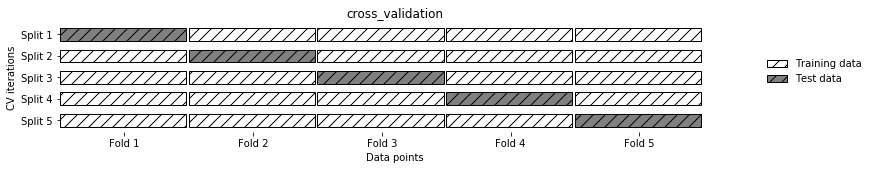

In [6]:
mglearn.plots.plot_cross_validation()

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
# cross_val_score의 변수는 3개가 들어감 : 사용할 모델 / 데이터 셋 / 타겟 셋
print ('cross_val_score {}'.format(scores))
# cross_val_score의 k dafault 는 3임.
# cv = num 변수를 통해서 k값을 변경 할 수 있음

cross_val_score [ 0.96078431  0.92156863  0.95833333]


In [8]:
# 보통 스코어의 평균을 사용함
scores = cross_val_score(logreg, iris.data, iris.target, cv = 5)
print ('k=5 scores {:.2f}'.format(scores.mean()))

k=5 scores 0.96


## 교차 검증의 장점

- train_test_split을 하더라도 경우에 따라선 데이터들이 몰릴 수가 있따
    - 즉 어느 경우엔 테스트가 잘나오고 어느때엔 트레인이 잘 나오는 등의 경우가 발생 가낭
- 교차 검증의 경우 테스트셋이 폴드마다 들어가기때문에 모델이 데이터 전체에 적합화 될 수 있음
- 분할을 한번 했을때보다 더 효과적으로 사용 할 수 있다.
    - train_test_split의 경우 75%(디폴트)를 사용하나 k-fold의 경우 더 다양하게 활용이 가능함
- 다만 연산비용이 늘어남
- k-fold는 score를 계산할 뿐 최적의 모델을 뽑아내는 함수가 아님

- cross_val_predict 함ㅅ를 사용하면 교차검증으로 만든 예측값을 구할 수 있다
    - 무슨말이지

In [9]:
print ('iris ravel {}'.format(iris.target))
# 이 경우 순서대로 레이블이 나뉘어져 있다.
# 이런경우엔 k를 3으로 둔다면 모든 경우에 정확도가 0이 나온다 => 알맞은 방법이 아니다
# 계층별 교차검증을 사용하면 된다

iris ravel [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


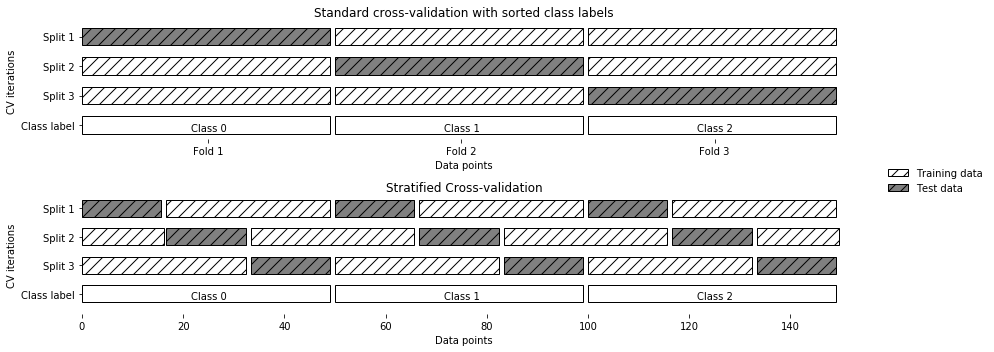

In [10]:
mglearn.plots.plot_stratified_cross_validation()

In [11]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5)

print ('cross val score {}'.format(cross_val_score(logreg, iris.data, iris.target, cv = kfold)))
# cross val socre의 경우 cv 파라미터는 단순히 k개의 갯수만을 뜻했다
# cross val score은 회귀에는 kfold, 분류에는 stratifiedKfold를 사용한다.
# 만약 분류모델에서 kfold를 사용하고 싶다면? - cv값에 kfold 객체 값을 넣어준다.

cross val score [ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [12]:
kfold = KFold(n_splits = 3)
print ('cross val score{}'.format(cross_val_score(logreg, iris.data, iris.target, cv = kfold)))
print ('cross val score {}'.format(cross_val_score(logreg, iris.data, iris.target, cv = 3)))
# iris는 분류 문제이게 때문에 StratifiedKFold를 사용함. 
# 따라서 같은 cv = 3이라 하더라도 결과가 다르다
# k-fold를 사용하면서 Stratified 처럼의 효과를 주고 싶으면 kfold의 shuffle 매개변수를 지정해주자 : True로

cross val score[ 0.  0.  0.]
cross val score [ 0.96078431  0.92156863  0.95833333]


In [13]:
from sklearn.model_selection import StratifiedKFold
kk = StratifiedKFold(n_splits = 3)
print ('cross_val_score {}'.format(cross_val_score(logreg, iris.data, iris.target, cv = kk)))

cross_val_score [ 0.96078431  0.92156863  0.95833333]


In [14]:
kfold = KFold(n_splits = 3, shuffle = True, random_state = 42) # 랜덤스테이트 설정해줘야 같은 조건이 유지됨
print ('cross val score {}'.format(cross_val_score(logreg, iris.data, iris.target, cv = kfold)))

cross val score [ 1.    0.92  1.  ]


## 또 다른 교차검증 방법인 LOOCV(Leave One Out Cross Validation)

- 폴드 하나에 샘플 하나만 들어있는 K-겹 교차 검증임
    - 무슨말일
   

In [15]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)
print ('cross val count : ', len(scores))
print ('scores.mean {:.2f}'.format(scores.mean()))

cross val count :  150
scores.mean 0.95


## 임의 분할 교차 검증 : shuffle-split cross validation

- train size 만큼의 포인트로 훈련세트를 만들고 test size만큼의 포인트로 (훈련세트와 중첩되지 않은) 테스트 세트를 만들도록 분할
- 분할 횟수는 n_splits 횟수 만큼 반복된다.
- 무슨말인지 모르겠다.
- 포인트가 뭐지.

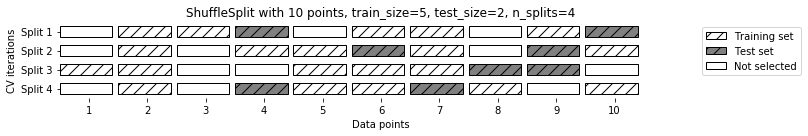

In [16]:
mglearn.plots.plot_shuffle_split()
# 샘플이 10개인 데이터셋을 5개 포인트의 훈련세트, 2개 포인트의 테스트 세트로 4번 반복하여 나누는 것을 보여준다.
# train_size, test_size에 정수 입력시 데이터 포인트의 절대 개수를 의미하고 실수를 입혁하면 전체 데이터에서의 비율을 나타낸다

In [17]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size =.5, train_size = .5, n_splits = 10) #비율을 주기 위해서 실수값으로 입력함
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print ('cross val score \n{}'.format(scores))

cross val score 
[ 0.90666667  0.96        0.94666667  0.93333333  0.96        0.98666667
  0.88        0.93333333  0.93333333  0.89333333]


- 임의 분할 교차 검증은 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절 할 때 유용
- train_size, test_size를 전체와 다르게 할 수 있다 = 전체 데이터에서 일부만 사용 가능(부분 샘플링)
- Shufflespit의 계층별 버젼으로 분류 작업에 더 적합한 StraifiedShuffleSpit도 있다.

## 그룹별 교차 검증

- 사진에서 표정을 인식하는 시스템을 만들기 위해 100며으이 사진을 모았다고 가정한다
    - 한 사람을 찍은 여러장의 사진이 각기 다른 표정을 담고 있다
- 이 데이터셋에 없는 사람의 표정을 정확히 구분할 수 있는 분류기를 만드는 것이 목적이라고 한다면
- 완전히 새로운 얼굴보다 훈련 세트에 있던 얼굴의 표정은 훨씬 쉽게 식별할 수 있을 것이다.
- 새 얼굴에 대한 일반화 성능을 더 정확하게 평가 하려면 훈련 세트와 테스트 세트에 서로 다른 사람의 사진이 들어가도록 해야한다.
- 이를 위해 GroupKFold를 사용 한다.
- 이는 훈련 세트와 테스트 세트를 만들때 분리되지 않아야 할 그룹을 지정하는 것이다.(클래스 레이블과는 다르다)

In [19]:
from sklearn.model_selection import GroupKFold
X, y = make_blobs(n_samples = 12, random_state = 0)
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
# 처음 세개의 샘플은 같은 그룹에 속하고
# 다음 네개의 샘플이 같다. ???
scores = cross_val_score(logreg, X, y, groups, cv = GroupKFold(n_splits = 3))
print ('cross val score : \n{}'.format(scores))

cross val score : 
[ 0.75        0.8         0.66666667]


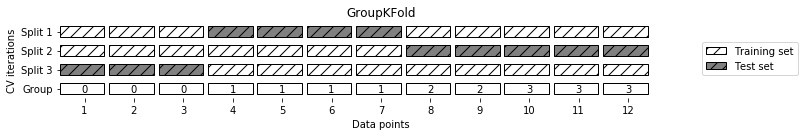

In [20]:
mglearn.plots.plot_group_kfold()

- 이거는 무슨 목적으로 하는거지. 클래스를 그룹화 해서 돌린다는 뜻인가.

## 5.2 Grid Search

- 관심있는 매개변수들을 대상으로 가능한 모든 조합을 시도하는 것

In [21]:
from sklearn.svm import SVC
X_train,X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
print ('train set size {}, test set size{}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001,0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test) # 테스트 세트로 SVC를 평가한다.
        if score > best_score: # 점수가 더 높으면 업데이트 한다.
            best_score = score
            best_parameters = {'C' : C, 'gamma' : gamma}
print ('best score {:.2f}'.format(best_score))
print ('best parameters {}'.format(best_parameters))

train set size 112, test set size38
best score 0.97
best parameters {'C': 100, 'gamma': 0.001}


- 위 결과는 정확도가 97% 이나 무조건 좋은 것이 아니다.
- 이 정확도는 새로운 데이터에까지 이어지지 않을 수 있다.
- 매개변수를 조정하기 위해 테스트 세트를 이미 사용했기 때문
- 그렇기에 평가를 위해서 모델을 만들때에는 사용하지 않은 독립된 데이터 셋이 필요로 하다.

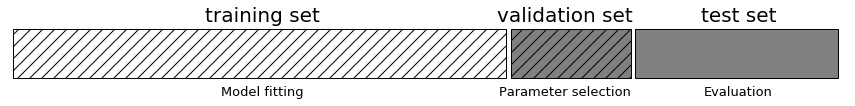

In [22]:
mglearn.plots.plot_threefold_split()

- 훈련 세트로 모델을 만들고 검증세트로는 모델의 매개변수를 선택하고 테스트 세트로는 선택된 매개변수의 성능을 평가한다

In [23]:
from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state =1)
# 기존 데이터 셋을 나눈다.
# 나눈 데이터 셋을 다시 또 나눈다.

print ('train set size {}, valid set size {}, test set size {}\n'.format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C=C)
        svm.fit(X_train,y_train)
        
        score = svm.score(X_valid, y_valid)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C' : C, 'gamma' : gamma}
        # 주어진 조건에서 베스트 파라미터를 찾는다.

svm = SVC(**best_parameters)
# 위에서 찾은 베스트 파라미터로 다시 테스트를 한다.
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print ('valid set best score {:.2f}'.format(best_score))
print ('best parameters', best_parameters)
print ('best score {:2f}'.format(test_score))


train set size 84, valid set size 28, test set size 38

valid set best score 0.96
best parameters {'C': 10, 'gamma': 0.001}
best score 0.921053


- 훈련세트, 검증세트, 테스트 세트의 구분은 매우 중요함
- 마지막 평가를 위해 테스트 세트를 보관하는 것을 권장함

## 교차검증을 사용한 그리드 서치

- 일반화 성능을 더 잘 평가하려면 훈련세트와 검증세트를 한번만 나누지 않고 교차검증을 사용해서 각 매개변수 조합의 성능을 평가 할 수 있다

In [24]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 1, 10, 100]:
        svm = SVC(gamma=gamma, C = C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv = 5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma' : gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
# 5겹 교차 검증에 따라서 정확도는 36 * 6 = 180개의 모델을 만들어야 한다.

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

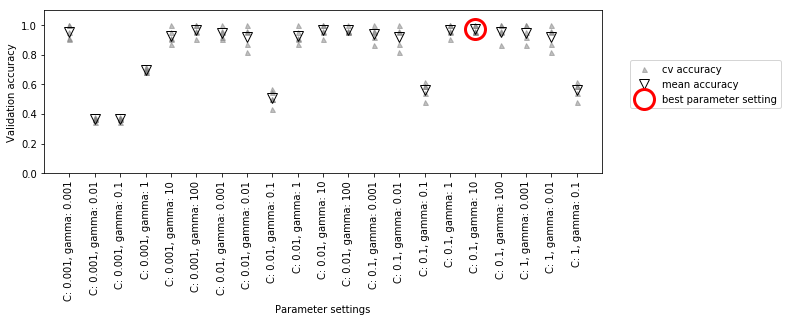

In [25]:
mglearn.plots.plot_cross_val_selection()

- 각 매개변ㄴ수 설정마다 교차검증 분할에 한개씩 모두 다섯개의 값을 계산한다.
- 교차 검증 정확도 평균이 가장 높은 매개변수를 동그라미로 표시

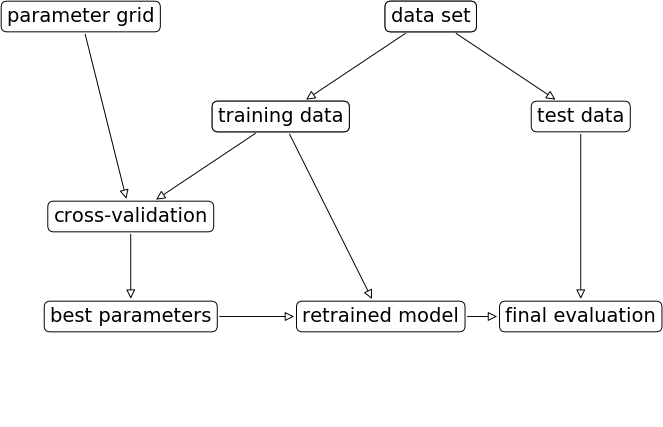

In [26]:
mglearn.plots.plot_grid_search_overview()

- sklearn에서는 추정기 형태로 구현된 GridSearchCV를 제공하고 있음
- 이를 사용하기 위해선 딕셔너리 형태로 매개변수를 지정해야한다.

In [27]:
param_grid = {'C' : [0.001, 0.01, 1, 10, 100],
             'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
print ('paramer grid \n{}'.format(param_grid))

paramer grid 
{'C': [0.001, 0.01, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
# 그리드 서치를 부르고, 파라미터 사전을 집어넣는다
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)


grid_search.fit(X_train, y_train)
# 지정된 그리드 서치로 fit 한다.
# predict, score 메서드를 제공한다.

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [29]:
print ('test set score {:.2f}'.format(grid_search.score(X_test, y_test)))
# 우리는 테스트 세트를 활용하지 않은 상태로 97의 스코어를 얻어냄

test set score 0.97


In [30]:
print ('best score {}'.format(grid_search.best_params_))
print ('best cross val score {}'.format(grid_search.best_score_))

best score {'C': 100, 'gamma': 0.01}
best cross val score 0.9732142857142857


In [31]:
# 최적 매개변수에서 전체 훈련 세트를 사용하여 학습한 모델은 best_estimator_에서 얻을 수 있다.
print ('best model \n{}'.format(grid_search.best_estimator_))

best model 
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


- gridsearch를 시각화 하면 이해하는데 도움이 됨
- gridsearch는 연산 비용이 매우 크므로 비교적 간격을 넓게하여 적은수의 그리드로 시작하는 것이 좋다.
- gridsearch 결과는 cv_results_ 속성에 담겨져 있다
- 주어진 범위에서 매개변수를 무작위로 선택하여 조사하는 RandomizedSearchCV도 있다.

In [32]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001203,0.000401,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",19,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000401,0.000491,0.011371,0.002852
1,0.001800,0.000400,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",19,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000398,0.000490,0.011371,0.002852
2,0.001605,0.001003,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",19,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000802,0.000002,0.011371,0.002852
3,0.001596,0.000802,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",19,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000809,0.000401,0.011371,0.002852
4,0.001417,0.000602,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",19,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000494,0.000492,0.011371,0.002852


In [33]:
results.shape

(30, 22)

In [34]:
results.columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_C', 'param_gamma', 'params',
       'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'split3_test_score', 'split3_train_score',
       'split4_test_score', 'split4_train_score', 'std_fit_time',
       'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

- results 행 하나는 특정한 하나의 매개변수 설정에 대응한다
- 각 설저엥 대해 교차 검정의 모든 분할의 평균값, 표준편차를 포함한 결과가 기록되어 있음.
- 검색대상 그리드가 2차원이므로(C, gamma) 히트맵으로 시각화 하기 좋다

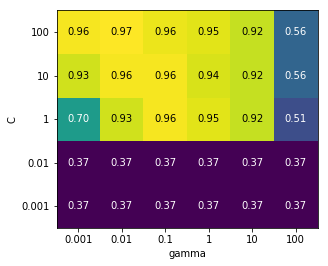

In [35]:
scores = np.array(results.mean_test_score).reshape(5,6)
mglearn.tools.heatmap(scores, xlabel = 'gamma', xticklabels = param_grid['gamma'],
                      ylabel = 'C', yticklabels = param_grid['C'], cmap = 'viridis')

- heatmap의 각 포인트는 특정 매개변수 설정에 대한 교차 검증 실행을 나타냅니다.
- 정확도가 높으면 밝은색으로, 낮으면 어두운 색으로 나타낸다.
- svc가 매개변수 설정에 매우 민감함
- 많은 매개변수 설정에서 40%부군의 낮은 정확도를 내고 있지만 어떤 설정에서는 96% 이상을 만들었다.


In [36]:
np.linspace(-3,2,6)

array([-3., -2., -1.,  0.,  1.,  2.])

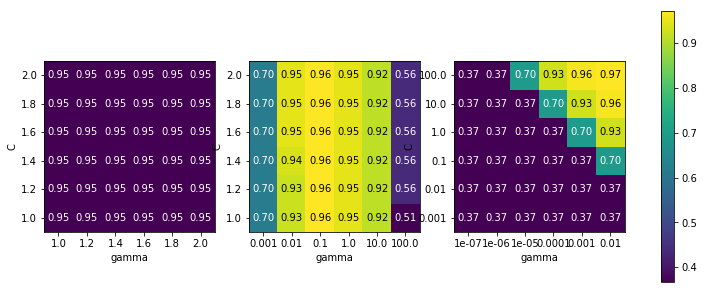

In [37]:
fig, axes = plt.subplots(1,3, figsize = (13, 5))

param_grid_linear = {'C' : np.linspace(1,2,6),
                    'gamma' : np.linspace(1,2,6)}

param_grid_one_log = {'C':np.linspace(1,2,6),
                     'gamma' : np.logspace(-3,2,6)}

param_grid_range = ({'C' : np.logspace(-3,2,6),
                 'gamma' : np.logspace(-7,-2,6)})

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                          param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    
    scores_image = mglearn.tools.heatmap(scores, xlabel = 'gamma', ylabel = 'C', 
                                        xticklabels = param_grid['gamma'],
                                        yticklabels = param_grid['C'],
                                        cmap = 'viridis', ax = ax)
    
plt.colorbar(scores_image, ax = axes.tolist())

- 첫번째 그래프
    - 점수 변화가 전혀 없다
    - gamma, c의 스케일과 범위가 모두 부적절할때 발생함
    - 또는 매개변수가 전혀 중요하지 않은 경우 일 수도 있다.
- 두번째 그래프
    - 세로띠 형태를 보인다
    - 이는 gamma 매개변수만 정확도에 영향을 준다는 뜻.
    - gamma는 제대로 범위를 탐색하고 있지만 c는 그렇지 못하고 있다. (또는 중요하지 않다)
    
- 세번째 그래프
    - 왼쪽 아래에선 아무런 변화가 없다. 
    - 다음번 검색때에는 매우 작은 단위는 제외 될것
   
- 테스트 세트에다가 평가하면 안된다.

- 어떤 경우엔 매개변수 조합에 대해 gridsearch를 수행하는 것은 좋은 생각이 아닐 수도 있다.
- svc는 kernel에 따라서 다른 매개변수를 사용한다
    - kernel = linear 일 경우 c만을 사용
    - kernel = rbf 일 경우 c와 gamma를 사용
- 그렇기에 이런 경우에 param_grid를 딕셔너리의 리스트로 만들어주면 된다


In [38]:
param_grid = [{'kernel' : ['rbf'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel' : ['linear'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100]}]

print ('grid list \n{}'.format(param_grid))

grid list 
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [39]:
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print ('best param {}'.format(grid_search.best_params_))
print ('best scores {:.2f}'.format(grid_search.best_score_))

best param {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
best scores 0.97


In [40]:
results = pd.DataFrame(grid_search.cv_results_)

results.T.head()
# 편히 보기 위해서 전치시킴

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00180354,0.00179801,0.00120349,0.00140333,0.00120411,0.00359087,0,0,0.00312538,0.00312505,...,0.00312529,0.00312524,0,0,0.00312524,0.00312548,0,0,0.00312495,0
mean_score_time,0.000402069,0.000803089,0.000400925,0.000400782,0.000601912,0,0,0,0,0,...,0,0,0,0,0,0,0.00312572,0,0,0
mean_test_score,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,...,0.955357,0.946429,0.919643,0.5625,0.366071,0.848214,0.946429,0.973214,0.964286,0.964286
mean_train_score,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,...,0.988788,1,1,1,0.366079,0.855069,0.966538,0.984368,0.988813,0.993258
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100


- 기존 : 훈련, 검증, 테스트 세트로 데이터 분할
- 지금 : 훈련, 테스트 세트로 분할
    - 훈련 세트로 교차 검증을 수행
    - 여전히 한번만 나누기 때문에 결과가 불안정 하며 테스트 데이터의 분할에 크게 의존하게 됨
- 원본 데이터를 훈련세트와 테스트 세트로 한번만 나누느 방식 대신 교차 검증 분할 방식을 사용 할 수 있음
    - 이를 중첩 교차검증(nested cross-validation) 이라고 한다.
- 여기선 바깥쪽 루프에서 데이터를 훈련세트와 테스트 세트로 나눈다. 
- 각 훈련 세트에 대해 그리드 서치를 실행함
- 바깥쪽에서 분할된 테스트 세트의 점수를 최적의 매개변수 설정을 사용해 각각 측정한다.

- 이 방법은 테스트 점수의 목록을 만들어 준다.
- 이 점수들은 그리드 서치를 통해 찾은 최적 매개변수가 모델을 얼마나 일반화 시키는 지 알려준다
- 새로운 데이터에 적용할 모델을 만드는 것이 아니므로 미래의 데이터에 적용하기 위한 예측 모델을 사용하는데는 사용하지 않음
- 특정 데이터 셋에서 주어진 모델이 얼마나 잘 일반화 되는지 평가하는데 유용한 방법

In [41]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 
             'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv = 5),
                        iris.data, iris.target, cv = 5)
print ('cross val score : ', scores)
print ('mean score : ', scores.mean())

cross val score :  [ 0.96666667  1.          0.96666667  0.96666667  1.        ]
mean score :  0.98


- SVC는 iris 데이터셋에서 평균 교차 검증 정확도가 98%다 라고 말할 수 있다.

In [61]:
kr = 102
kr = np.inf
kr

inf

In [67]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, paramater_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(X, y): # outer_cv 는 stratifideKFold를 뜻함. k겹 교차 검증
        # k겹 교차검증(5)의 결과물을 X, y로 구분, 이를 training / test로 명시
        best_params = {}
        best_score = -np.inf # ??
        for parameters in paramater_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(
            X[training_samples], y[training_samples]): # inner_cv -> k겹교차검증(5)
                # 교차검증의 결과를 나누는데 위에와 다르다. 나누는게
                # print (X[training_samples].shape, training_samples.shape)
                # 이렇게 한 결과 (120,4), (120) 이렇게 무수히 많이 나옴..
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [68]:
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), 
                  StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print ('cross val score {}'.format(scores))

(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4)

(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4)

In [54]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, paramater_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(X, y): # outer_cv 는 stratifideKFold를 뜻함. k겹 교차 검증
        # k겹 교차검증(5)의 결과물을 X, y로 구분, 이를 training / test로 명시
        best_params = {}
        best_score = -np.inf # ??
        for parameters in paramater_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(
            X[training_samples], y[training_samples]): # inner_cv -> k겹교차검증(5)
                # 교차검증의 결과를 나누는데 위에와 다르다. 나누는게
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [55]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), 
                  StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print ('cross val score {}'.format(scores))

cross val score [ 0.96666667  1.          0.96666667  0.96666667  1.        ]


## 5.3 평가 지표와 측정

- 기존 평가방법으로 분류에는 정확도(정확하게 분류된 샘플의 비율)
- 회귀에는 R스퀘어를 사용 
- 실전에는 다른 방법도 있다.
- 목표를 정확히 설정해야한다.

- 이진분류의 평가 지표로서 에러에는 몇가지 종류가 있음
- 거짓인데 진실로 판정 했거나 진실인데 거짓으로 판정 했을 경우
- 이를 암 환자의 진단으로 비유 하자면
- 양성인데(환자인데) 음성(건강)으로 판단 : 환자 건강, 생명에 피해, 
    - 환자를 건강하다고 판단, 즉 거짓을 진실로 판단 : 거짓 음성(false negative)
    - 타입 2 에러
- 음성인데(건강한데) 양성(환자)로 판단 : 추가적인 비용 발생
    - 건강한 사람을 환자로 판단, 즉 진실을 거짓으로 판단 : 거짓 양성(false positive)
    - 타입 1 에러
- 암 진단에서는 거짓 음성을 최대한 피하는 게 목표임

- 데이터 셋에서 클래스의 균형이 안맞는 데이터 셋을 불균형 데이터 셋(imbalanced datasets) 이라고 한다.

In [71]:
# 숫자 9를 다른 숫자와 구분해서 9:1의 불균형한 데이터 셋을 만들자

from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)


In [74]:
# 항상 다수의 클래스를 예측값으로 내놓은 DUmmy 사용

from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print ('predicted ravel {}'.format(np.unique(pred_most_frequent)))
print ('test score : {:.2f}'.format(dummy_majority.score(X_test, y_test)))

# 학습한 내용이 하나도 없이 90%의 정확도를 얻음.

predicted ravel [False]
test score : 0.90


In [77]:
# LogisticRegression과 비교
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

print ('dummy score {:.2f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C = 0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

print ('logres score {:.2f}'.format(logreg.score(X_test, y_test)))

dummy score 0.84
logres score 0.98


- 불균형 데이터 셋에서 예측 성능을 정량화 하는데 정확도는 적절한 측정 방법이 아니다.

## 오차 행렬
- 오차행렬(Confusion matrix)는 이진 분류 평가 결과를 나타낼때 가장 널리 사용하는 방법 중 하나
- confusion_matrix 함수를 사용
- 예측 결과는 pred_logreg에 저장됨

In [79]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)

print ('confusion matrix \n{}'.format(confusion))

confusion matrix 
[[401   2]
 [  8  39]]


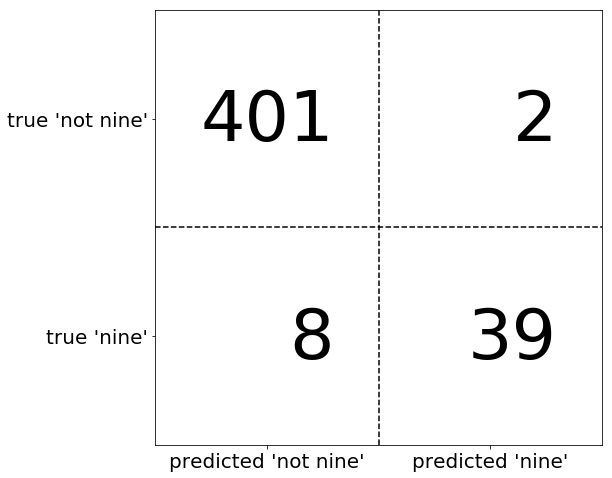

In [80]:
mglearn.plots.plot_confusion_matrix_illustration()

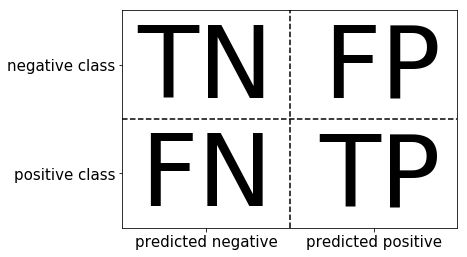

In [82]:
mglearn.plots.plot_binary_confusion_matrix()